<a href="https://colab.research.google.com/github/Amey-CK/Projects/blob/main/Chennai_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

##DATA CLEANING

In [ ]:
df=df.drop(columns=['PRT_ID','REG_FEE','COMMIS'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


In [ ]:
df.drop_duplicates()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7104 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7061 non-null   float64
 18  SALES_PR

In [ ]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [ ]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace =True)

In [ ]:
df.N_BATHROOM.fillna(df['N_BATHROOM'].mode()[0],inplace =True)  #categorical data so replaced with mode

In [ ]:
df.DATE_SALE=pd.to_datetime(df.DATE_SALE, format='%d-%m-%Y')
df['N_BEDROOM']=df['N_BEDROOM'].astype('int')
df['N_BATHROOM']=df['N_BATHROOM'].astype('int')
df.DATE_BUILD=pd.to_datetime(df.DATE_BUILD, format='%d-%m-%Y')
df.N_ROOM=df.N_ROOM.astype('int')

In [ ]:
df.QS_OVERALL.fillna((df.QS_ROOMS + df.QS_BATHROOM + df.QS_BEDROOM)/3)

0       4.330
1       3.765
2       3.090
3       4.010
4       3.290
        ...  
7104    2.520
7105    3.920
7106    3.840
7107    4.160
7108    3.640
Name: QS_OVERALL, Length: 7109, dtype: float64

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df.AREA=df.AREA.str.lower()
df.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [ ]:
df.AREA=df.AREA.replace('karapakkam','karapakam')
df.AREA=df.AREA.replace('ann nagar','anna nagar')
df.AREA=df.AREA.replace('ana nagar','anna nagar')
df.AREA=df.AREA.replace('adyr','adyar')
df.AREA=df.AREA.replace('velchery','velachery')
df.AREA=df.AREA.replace('chrompt','chrompet')
df.AREA=df.AREA.replace('chrmpet','chrompet')
df.AREA=df.AREA.replace('chormpet','chrompet')
df.AREA=df.AREA.replace('kk nagar','kknagar')
df.AREA=df.AREA.replace('t nagar','tnagar')

In [ ]:
df.AREA.unique()

array(['karapakam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kknagar', 'tnagar'], dtype=object)

In [ ]:
df.SALE_COND=df.SALE_COND.str.lower()
df.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [ ]:
df.SALE_COND=df.SALE_COND.replace('ab normal','abnormal')
df.SALE_COND=df.SALE_COND.replace('partiall','partial')
df.SALE_COND=df.SALE_COND.replace('adj land','adjland')

In [ ]:
df.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale'],
      dtype=object)

In [ ]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df.PARK_FACIL=df.PARK_FACIL.replace('Noo','No')

In [ ]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df.BUILDTYPE=df.BUILDTYPE.replace('Comercial','Commercial')
df.BUILDTYPE=df.BUILDTYPE.replace('Others','Other')

In [ ]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.str.lower()

In [ ]:
df.UTILITY_AVAIL=df.UTILITY_AVAIL.replace('all pub','allpub')

In [ ]:
df.UTILITY_AVAIL =df.UTILITY_AVAIL.replace('nosewa','nosewr')
df.UTILITY_AVAIL =df.UTILITY_AVAIL.replace('nosewr ','nosewr')

In [ ]:
df.UTILITY_AVAIL.unique()

array(['allpub', 'elo', 'nosewr'], dtype=object)

In [ ]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df.STREET=df.STREET.replace('Pavd','paved')
df.STREET=df.STREET.replace('No Access','noaccess')

In [ ]:
df.STREET=df.STREET.str.lower()
df.STREET.unique()

array(['paved', 'gravel', 'noaccess'], dtype=object)

In [ ]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7.109000e+03
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503254,1.089491e+07
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.527223,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07


Outlier Detection

There are no unnecessary outliers present.


##EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


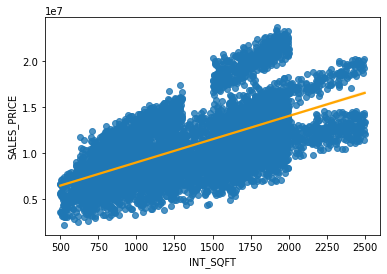

In [ ]:
sns.regplot(df.INT_SQFT,df.SALES_PRICE,data=df,line_kws ={'color':'orange'})

In [ ]:
df['INT_SQFT'].corr(df.SALES_PRICE)

0.6121248760738686

INT_SQFT has direct correlation with sales price


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


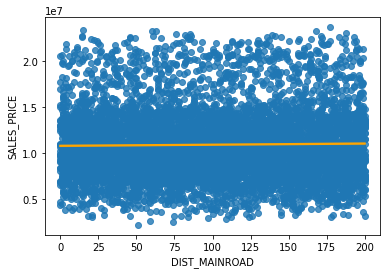

In [ ]:
sns.regplot(df.DIST_MAINROAD,df.SALES_PRICE,data=df,line_kws={'color':'orange'})

In [ ]:
df.DIST_MAINROAD.corr(df.SALES_PRICE)

0.018783412253401615

There is no linear correlation with of SALE_PRICE with DSIT_MAINROAD. So we will drop the feature.

In [ ]:
df=df.drop(columns=['DIST_MAINROAD'])

In [ ]:
df['Age'] = pd.DatetimeIndex(df.DATE_SALE).year - pd.DatetimeIndex(df.DATE_BUILD).year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


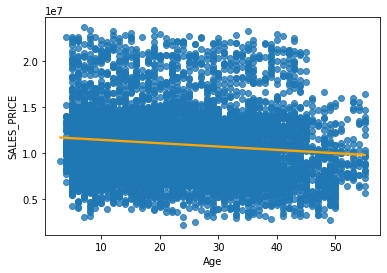

In [ ]:
sns.regplot(df.Age,df.SALES_PRICE,data=df,line_kws={'color':'orange'})

In [ ]:
df.Age.corr(df.SALES_PRICE)

-0.1188421570012124

In [ ]:
df=df.drop(columns=['DATE_SALE','DATE_BUILD'])

With age sales price is decreasing. Age will be cosnsider as a factor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


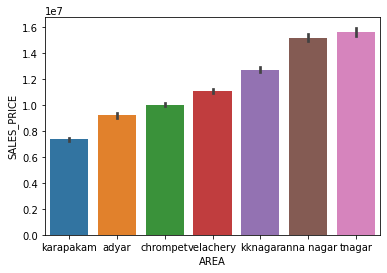

In [ ]:
area_order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(df.AREA,df.SALES_PRICE,data=df,order=area_order)

AREA has linear relationship with SALES_PRICE. Here we can do label encoding starting with karapakam as 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


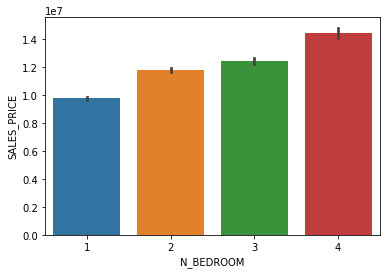

In [ ]:
n_bedroom_order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']
sns.barplot(df.N_BEDROOM, df.SALES_PRICE, data=df,order=n_bedroom_order)

N_BEDROOM affects sales price.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


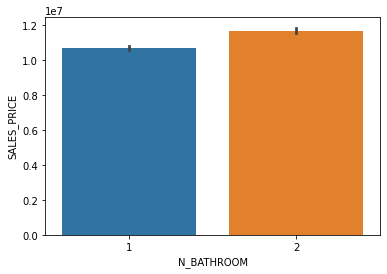

In [ ]:
n_bathroom_order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM']
sns.barplot(df.N_BATHROOM, df.SALES_PRICE, data=df,order=n_bathroom_order)

N_BATHROOM affects sales price.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


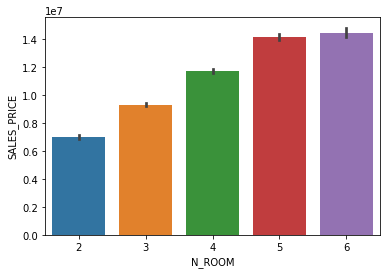

In [ ]:
n_room_order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM']
sns.barplot(df.N_ROOM, df.SALES_PRICE, data=df,order=n_room_order)

With n room sales price increases.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


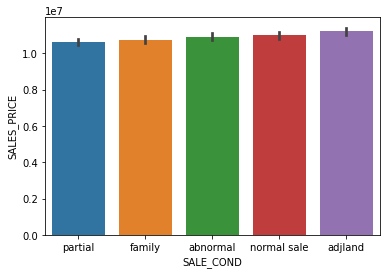

In [ ]:
sale_cond_order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(df.SALE_COND, df.SALES_PRICE, data=df,order=sale_cond_order)

SALE_COND doesn't show variation. So we will drop it.

In [ ]:
df=df.drop(columns=['SALE_COND'])

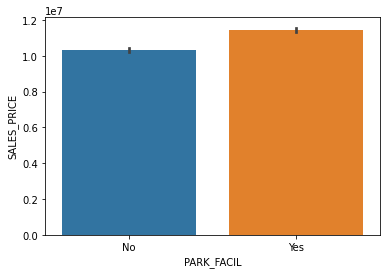

In [ ]:
park_order = df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
sns.barplot(x=df.PARK_FACIL, y=df.SALES_PRICE ,data =df, order =park_order)

We will consider PARK_FACIL as a feature affecting SALES_PRICE

In [ ]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Age
0,karapakam,1004,1,1,3,Yes,Commercial,allpub,paved,A,4.0,3.9,4.9,4.330,7600000,44
1,anna nagar,1986,2,1,5,No,Commercial,allpub,gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,adyar,909,1,1,3,Yes,Commercial,elo,gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,velachery,1855,3,2,5,No,Other,nosewr,paved,I,4.7,3.9,3.6,4.010,9630290,22
4,karapakam,1226,1,1,3,Yes,Other,allpub,gravel,C,3.0,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakam,598,1,1,2,No,Other,elo,noaccess,RM,3.0,2.2,2.4,2.520,5353000,49
7105,velachery,1897,3,2,5,Yes,Other,nosewr,noaccess,RH,3.6,4.5,3.3,3.920,10818480,9
7106,velachery,1614,2,1,4,No,House,nosewr,gravel,I,4.3,4.2,2.9,3.840,8351410,28
7107,karapakam,787,1,1,2,Yes,Commercial,elo,paved,RL,4.6,3.8,4.1,4.160,8507000,32


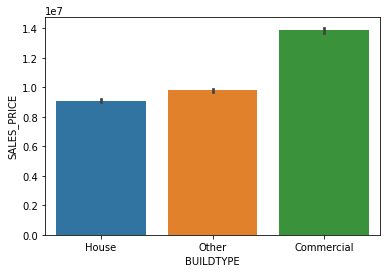

In [ ]:
buildtype_order = df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
sns.barplot(x=df.BUILDTYPE, y=df.SALES_PRICE ,data =df, order =buildtype_order)

SALES_PRICE increase with buildtype. We will use label encoding.

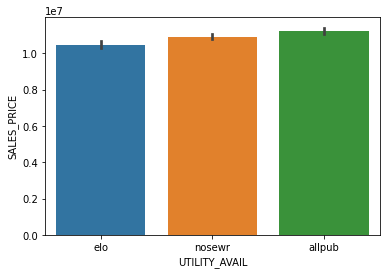

In [ ]:
utility_order = df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x=df.UTILITY_AVAIL, y=df.SALES_PRICE ,data =df, order =utility_order)

SALES_PRICE slightly increases with UTILITY_AVAIL. We will consider this factor.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


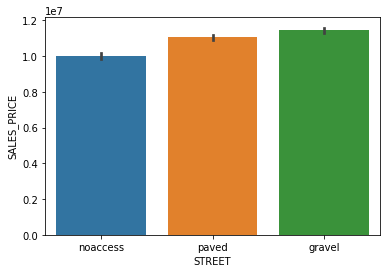

In [ ]:
street_order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(df.STREET,df.SALES_PRICE,data=df,order=street_order)

STREET is factor affecting SALES_PRICE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


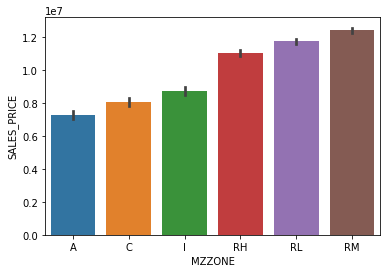

In [ ]:
mzzone_order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(df.MZZONE,df.SALES_PRICE,data=df,order=mzzone_order)

MZZONE is factor to be cosider. Here A till I will be 0 to 2. For RH it will be 4, RL=5, RM=6

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


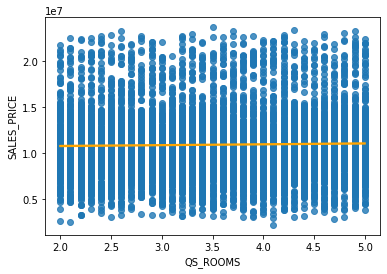

In [ ]:
sns.regplot(df.QS_ROOMS,df.SALES_PRICE,data=df,line_kws={'color':'orange'})

Drop QS_ROOMS.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


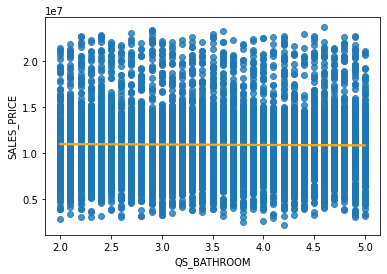

In [ ]:
sns.regplot(df.QS_BATHROOM,df.SALES_PRICE,data=df,line_kws={'color':'orange'})

Drop QS_BATHROOM

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


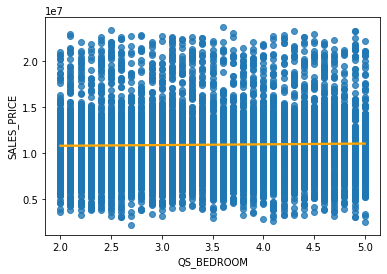

In [ ]:
sns.regplot(df.QS_BEDROOM,df.SALES_PRICE,data=df,line_kws={'color':'orange'})

Drop QS_BEDROOM

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


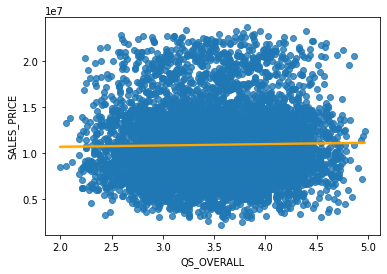

In [ ]:
sns.regplot(df.QS_OVERALL,df.SALES_PRICE,line_kws={'color':'orange'})

In [ ]:
df.QS_OVERALL.corr(df.SALES_PRICE)

0.020556111968052

Drop QS_OVERALL.


In [ ]:
df=df.drop(columns=['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'])

In [ ]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Age
0,karapakam,1004,1,1,3,Yes,Commercial,allpub,paved,A,7600000,44
1,anna nagar,1986,2,1,5,No,Commercial,allpub,gravel,RH,21717770,11
2,adyar,909,1,1,3,Yes,Commercial,elo,gravel,RL,13159200,20
3,velachery,1855,3,2,5,No,Other,nosewr,paved,I,9630290,22
4,karapakam,1226,1,1,3,Yes,Other,allpub,gravel,C,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,karapakam,598,1,1,2,No,Other,elo,noaccess,RM,5353000,49
7105,velachery,1897,3,2,5,Yes,Other,nosewr,noaccess,RH,10818480,9
7106,velachery,1614,2,1,4,No,House,nosewr,gravel,I,8351410,28
7107,karapakam,787,1,1,2,Yes,Commercial,elo,paved,RL,8507000,32


##Encoding

In [ ]:
df.PARK_FACIL=df.PARK_FACIL.map({'Yes':1,'No':0})#label encoding

In [ ]:
df=pd.get_dummies(df,columns=['AREA','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE'])#one hot encoding

##Linear Regression

In [ ]:
x=df.drop('SALES_PRICE',axis=1).values
y=df['SALES_PRICE'].values

In [ ]:
#split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled= scaler.transform(x_train) 
x_test_scaled= scaler.transform(x_test)

In [ ]:
#Model fitting
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred_linear=regressor.predict(x_test_scaled)

In [ ]:
#Evaluation metric r2_score
from sklearn import metrics
print('R2_score for linear regression model',metrics.r2_score(y_test,y_pred_linear))

R2_score for linear regression model 0.9515424511376838


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

Hyperparameter tuning

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,15,20,25,30,50]:
  knn=KNeighborsRegressor(i)
  knn.fit(x_train_scaled,y_train)
  print('k value:',i,'  train_score:',knn.score(x_train_scaled,y_train),'  score:',np.mean(cross_val_score(knn,x_train_scaled,y_train,cv=3)))


k value: 1   train_score: 0.9999998554651082   score: 0.8981653172121004
k value: 2   train_score: 0.9807479751685988   score: 0.9080316105833167
k value: 3   train_score: 0.9681015503537148   score: 0.9097213457016933
k value: 4   train_score: 0.9598790858863232   score: 0.9129465183191979
k value: 5   train_score: 0.9540964427962583   score: 0.9130483332956955
k value: 6   train_score: 0.9485929894964311   score: 0.912802745409087
k value: 7   train_score: 0.9451316408643142   score: 0.9114883362040348
k value: 8   train_score: 0.9422328199454482   score: 0.9105121909641308
k value: 9   train_score: 0.9397275140961682   score: 0.9095335483920555
k value: 10   train_score: 0.9376216614589318   score: 0.9074920457855996
k value: 15   train_score: 0.928072539115741   score: 0.9006771352162218
k value: 20   train_score: 0.919555044918638   score: 0.8936258457001176
k value: 25   train_score: 0.911101192964273   score: 0.8882216740623713
k value: 30   train_score: 0.9047783923609745   sco

We select k value as 3

In [ ]:
knn=KNeighborsRegressor(3)
knn.fit(x_train_scaled,y_train)
y_pred_knn=knn.predict(x_test_scaled)

In [ ]:
print('R2_score for knn model is : ',metrics.r2_score(y_test,y_pred_knn))

R2_score for knn model is :  0.927828167178802


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
for depth in [1,2,3,4,5,6,7,8,9,10,15,17,18,19,20,21,22,23,24,25]:
  dt=DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train_scaled,y_train)
  print('depth :',depth,'  accuracy score:',dt.score(x_train_scaled,y_train),'  cross_val_score:',np.mean(cross_val_score(dt,x_train_scaled,y_train)))

depth : 1   accuracy score: 0.31374273898081073   cross_val_score: 0.30921202683452786
depth : 2   accuracy score: 0.6272260248087098   cross_val_score: 0.6223055090894597
depth : 3   accuracy score: 0.7546480189440907   cross_val_score: 0.7513306664074962
depth : 4   accuracy score: 0.8506770736125789   cross_val_score: 0.8459362667982322
depth : 5   accuracy score: 0.895085069729527   cross_val_score: 0.8891323254974163
depth : 6   accuracy score: 0.9290183883305074   cross_val_score: 0.9192572379956312
depth : 7   accuracy score: 0.9490793302270124   cross_val_score: 0.9378277573482932
depth : 8   accuracy score: 0.9644399262616852   cross_val_score: 0.9506959209340595
depth : 9   accuracy score: 0.9766891246753854   cross_val_score: 0.958799965818935
depth : 10   accuracy score: 0.9855987498908192   cross_val_score: 0.9648725411387247
depth : 15   accuracy score: 0.9996726849270854   cross_val_score: 0.9674415078400103
depth : 17   accuracy score: 0.9999683059528168   cross_val_sco

we chose max_depth as 18

In [ ]:
dt=DecisionTreeRegressor(max_depth=18)
dt.fit(x_train_scaled,y_train)
y_pred_dt =dt.predict(x_test_scaled)

In [ ]:
print('R2 score for Decision Tree is :',metrics.r2_score(y_test,y_pred_dt))

R2 score for Decision Tree is : 0.9676858494956174


##Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
for depth in [9,10,15,20,25,30,50]:
    rfr=RandomForestRegressor(max_depth=depth)
    rfr.fit(x_train_scaled,y_train)
    print('  max_depth:',depth,'  Accuracy:',rfr.score(x_train_scaled,y_train),'  cross_val_score:',np.mean(cross_val_score(rfr,x_train_scaled,y_train)))

  max_depth: 9   Accuracy: 0.9859786076377914   cross_val_score: 0.9761300704829223
  max_depth: 10   Accuracy: 0.9915477485866161   cross_val_score: 0.9807920612254095
  max_depth: 15   Accuracy: 0.9980609919345442   cross_val_score: 0.9853329204902062
  max_depth: 20   Accuracy: 0.9981874873653488   cross_val_score: 0.9852201414119282
  max_depth: 25   Accuracy: 0.9981349108177983   cross_val_score: 0.9853939098003904
  max_depth: 30   Accuracy: 0.9981722930462239   cross_val_score: 0.985371047894886
  max_depth: 50   Accuracy: 0.9981353808689957   cross_val_score: 0.9852028508837847


In [ ]:
rfr=RandomForestRegressor(max_depth=25,max_features='sqrt')
rfr.fit(x_train_scaled,y_train)
y_pred_rfr=rfr.predict(x_test_scaled)

In [ ]:
print('R2 score for Radm forest is : ',metrics.r2_score(y_test,y_pred_rfr))

R2 score for Radm forest is :  0.9853044135177702


##XG Boost

In [ ]:
import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model=xgb.XGBRegressor(learning_rate=lr,n_estimators=100,verbosity=0)
  model.fit(x_train_scaled,y_train)
  print('learning_rate: ',lr,'  score:',model.score(x_train_scaled,y_train),'  cross_val_score:',np.mean(cross_val_score(model,x_train_scaled,y_train)))


learning_rate:  0.01   score: -0.4195145421672657   cross_val_score: -0.42989089509689593
learning_rate:  0.02   score: 0.7176717667597604   cross_val_score: 0.7127599301474206
learning_rate:  0.03   score: 0.908496205203932   cross_val_score: 0.9052694752379521
learning_rate:  0.04   score: 0.9537719510068835   cross_val_score: 0.9503173314892734
learning_rate:  0.05   score: 0.9690931058307901   cross_val_score: 0.9662571508572106
learning_rate:  0.06   score: 0.9770029401817542   cross_val_score: 0.9750934587953062
learning_rate:  0.07   score: 0.9825498409021837   cross_val_score: 0.9804172608709105
learning_rate:  0.08   score: 0.9854903678301427   cross_val_score: 0.9833989534830992
learning_rate:  0.09   score: 0.9877563997657227   cross_val_score: 0.9859842588378978
learning_rate:  0.1   score: 0.989437281461705   cross_val_score: 0.9875198907925391
learning_rate:  0.11   score: 0.9904139770588092   cross_val_score: 0.9889380041386572
learning_rate:  0.12   score: 0.99149734564

We select learning rate as 0.5

In [ ]:
model= xgb.XGBRegressor(lr=0.5,n_estimators=100,verbosity=0)
model.fit(x_train_scaled,y_train)
y_pred_model=model.predict(x_test_scaled)

In [ ]:
print('R2 score for XGBoost is :',metrics.r2_score(y_test,y_pred_model))

R2 score for XGBoost is : 0.9874626782414574


In [ ]:
#feature importance
a=list(model.feature_importances_)
b=list(df.columns.drop('SALES_PRICE'))
df1=pd.DataFrame({'Features':b,'Importance':a})
df1


,Features,Importance
0,INT_SQFT,0.058812
1,N_BEDROOM,0.018838
2,N_BATHROOM,0.000101
3,N_ROOM,0.375550
4,PARK_FACIL,0.010976
5,Age,0.001803
6,AREA_adyar,0.000903
7,AREA_anna nagar,0.060829
8,AREA_chrompet,0.000266
9,AREA_karapakam,0.084505


# **Conclusion-**
XGboost model gave the highest r2_score of 0.987 followed by the following model- 


*   Linear regression -0.951
*   KNN - 0.927
*   Decision Tree -0.967
*   Random Forest Regressor -0.985

## For real estate agent-


*   Construction in 't nagar' and 'anna nagar' attracts high sales_price. 
*   Commercial building has high sales price than other two given the facilities of parking and utilities with good road connectivity.
*  Following MZZONE sequence is in accordance with increasing sales price- A,C,I,RH,RL,RM 

# For the buyers-
For any buildtype buyers must search areas in the following sequence - 'karapakam', 'adyar', 'chrompet','velachery','kknagar','anna nagar', 'tnagar' where sales price increases with the sequence.























